# 비지도학습 (Unsupervised) - cluster

In [101]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

from IPython.display import Image

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# regression 성능평가 지표
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve, roc_curve,roc_auc_score 
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler, Binarizer
import graphviz

import missingno as msno

import folium

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

In [ ]:
Image('C:/img/clustering-01.png',width = 700)

In [ ]:
Image('C:/img/clustering-02.png',width = 700)

In [ ]:
Image('C:/img/clustering-03.png',width = 700)

In [ ]:
Image('C:/img/clustering-04.png',width = 700)

In [5]:
cluster_frm = pd.DataFrame(columns = ('x','y'))
cluster_frm.loc[0] = [7,1] 
cluster_frm.loc[1] = [2,1] 
cluster_frm.loc[2] = [4,2] 
cluster_frm.loc[3] = [9,4] 
cluster_frm.loc[4] = [10,5] 
cluster_frm.loc[5] = [10,6] 
cluster_frm.loc[6] = [11,5] 
cluster_frm.loc[7] = [11,6]
cluster_frm.loc[8] = [15,3] 
cluster_frm.loc[9] = [15,2]
cluster_frm.loc[10] = [16,6]
cluster_frm.loc[11] = [16,1] 
cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


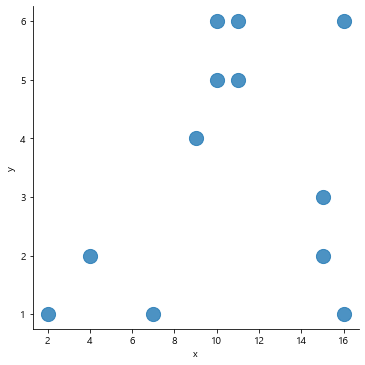

In [26]:
sns.lmplot('x','y',
           data = cluster_frm, 
           fit_reg = False, 
           scatter_kws = {'s':200})
plt.show()
plt.close()

In [18]:
data_points = cluster_frm.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 3],
       [15, 2],
       [16, 6],
       [16, 1]], dtype=object)

In [19]:
kmeans = KMeans(n_clusters = 3).fit(data_points)
print('type : ', type(kmeans))

type :  <class 'sklearn.cluster._kmeans.KMeans'>


In [23]:
kmeans.labels_

array([2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
cluster_frm['cluster_id'] = kmeans.labels_
cluster_frm

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,1
9,15,2,1


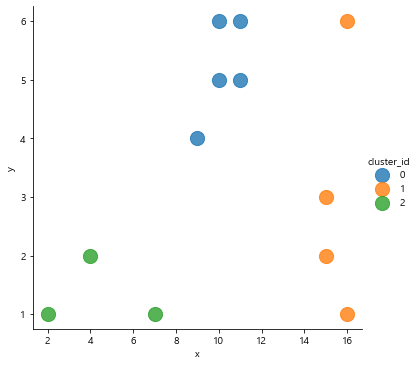

In [27]:
sns.lmplot('x','y',
           data = cluster_frm, 
           fit_reg = False, 
           scatter_kws = {'s':200},
           hue ='cluster_id' )
plt.show()
plt.close()

### 분류용 가상 데이터 생성
### make_blobs(n_samples = 표본수 , n_features = 독립변수의 수 , centers = 클러스터의 수)

In [39]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 300, # 표본수
                n_features = 2, # 독립변수의 수
                centers = 3, 클러스터의 수
                random_state = 50)

In [40]:
X

array([[ 2.5972879 , -6.92972642],
       [-1.43597256,  8.64861482],
       [-5.13182105, -1.66577757],
       [-1.45543243,  9.43524673],
       [-5.19673657, 10.44682061],
       [-1.69243554,  9.92657677],
       [-2.04719088,  7.04347537],
       [ 0.09220439, -4.58982883],
       [-5.08725777, -2.95357768],
       [-1.81086521,  8.6906333 ],
       [-3.99746797,  0.12867795],
       [-4.74129256, -0.18852021],
       [-5.1524956 , -1.99022112],
       [-0.90118371, -5.47717331],
       [-0.10637535, -5.99387904],
       [-5.25217192, -2.5578901 ],
       [-0.66454562, -6.15609103],
       [-1.07353789, -4.06798364],
       [ 1.52703774, -5.10612461],
       [-2.07646327,  9.65733364],
       [-2.39831178,  9.62525578],
       [-5.33922597, -1.38385404],
       [-5.59471028, -3.85196578],
       [-1.97993905, 11.26650111],
       [-3.80101271, -0.85123107],
       [-3.85911624, -3.86133366],
       [-0.9989217 , -5.70898425],
       [-3.04166407, 10.8080875 ],
       [-5.46706931,

In [41]:
y

array([0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0])

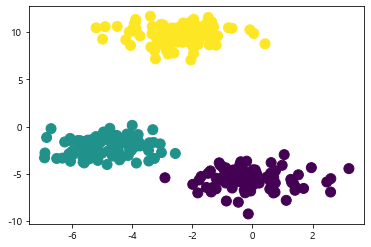

In [42]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100)
plt.show()
plt.close()

In [44]:
feature ,label = make_blobs(random_state=1)
clustering=KMeans(n_clusters=3)
clustering.fit(feature)

KMeans(n_clusters=3)

In [45]:
clustering.labels_ # 예측값

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [46]:
clustering.predict(feature) # 군집화에 대한 정보들 (정답데이터는 X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

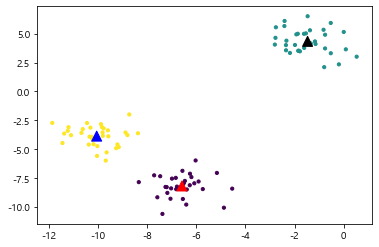

In [53]:
plt.scatter(feature[:,0],feature[:,1],marker='o',c=clustering.labels_,s=10)


plt.scatter(clustering.cluster_centers_[:,0],
           clustering.cluster_centers_[:,1],
           marker = '^',
           c=['r','k','b'],
           s=100)

plt.show()
plt.close()

In [49]:
# centroid (센터 값)
clustering.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

### iris로 클러스터링해보기


In [55]:
iris = load_iris()
iris_frm = pd.DataFrame(data=iris.data,
                       columns = iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
print('KMean 객체를 생성하고 군집화 수행')
iris_clustering = KMeans(n_clusters = 3,
                        random_state = 0,
                        verbose = 1,
                        init ='k-means++',
                        max_iter = 300)
iris_clustering

KMean 객체를 생성하고 군집화 수행


KMeans(n_clusters=3, random_state=0, verbose=1)

In [60]:
# 클러스터 레이블
iris_clustering.fit(iris_frm)
iris_clustering.labels_

Initialization complete
Iteration 0, inertia 98.46999999999997
Iteration 1, inertia 83.25891944444447
Iteration 2, inertia 82.25856145640073
Iteration 3, inertia 81.32806489357331
Iteration 4, inertia 80.0594266200554
Iteration 5, inertia 79.57585726935399
Iteration 6, inertia 78.99749895643232
Iteration 7, inertia 78.85566582597727
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 117.13000000000001
Iteration 1, inertia 82.46881015900325
Iteration 2, inertia 79.19714263977781
Iteration 3, inertia 78.851441426146
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 167.37000000000003
Iteration 1, inertia 85.72393674951728
Iteration 2, inertia 80.01094735231096
Iteration 3, inertia 79.16851704724698
Iteration 4, inertia 78.92130972222225
Iteration 5, inertia 78.85566582597727
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 94.64999999999998
Iteration 1, inertia 82.86

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [61]:
iris_clustering.predict(iris_frm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [62]:
iris_frm['cid'] = iris_clustering.labels_
iris_frm['target'] = iris.target
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [63]:
# 그룹을 cid, target을 통한 sepal_length 빈도를 확인해본다면?
iris_frm.groupby(['cid','target'])['sepal length (cm)'].count()

cid  target
0    1         48
     2         14
1    0         50
2    1          2
     2         36
Name: sepal length (cm), dtype: int64

### 주성분 분석에 앞서서 iris 시각화를 위한 차원축소

In [65]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2) # 데이터프레임을 차원축소해서 2개의 값으로 만들어줌.
iris_pca_transform = iris_pca.fit_transform(iris.data)

iris_pca_transform 

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [66]:
# 데이터프레임에 새컬럼으로 추가
iris_frm['pca_x'] = iris_pca_transform[:,0]
iris_frm['pca_y'] = iris_pca_transform[:,1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


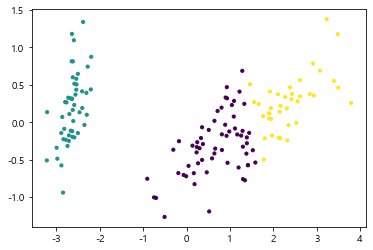

In [67]:
# 시각화
plt.scatter(x=iris_frm['pca_x'],
           y=iris_frm['pca_y'],
           marker='o',
           c=iris_frm['cid'],
           s=10)

plt.show()
plt.close()

#### iris데이터는 feature unit이 같아서 scaling 필요 없음

## case02 - feature unit이 다른 경우 scaling 후에 차원축소 및 시각화

In [68]:
def feature_scaling(method='None', input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    return scaled_data

In [75]:
std_scaler = feature_scaling(method='Standard', input_data=iris_frm.iloc[:,0:4])
std_scaler

iris_pca = PCA(n_components = 2) # 데이터프레임을 차원축소해서 2개의 값으로 만들어줌.
iris_pca_transform = iris_pca.fit_transform(std_scaler)

iris_frm['std_pca_x']= iris_pca_transform[:,0]
iris_frm['std_pca_y']= iris_pca_transform[:,1]

iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254


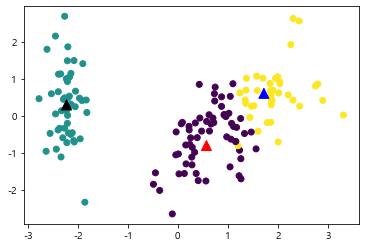

In [80]:
iris_clustering = KMeans(n_clusters=3)
iris_clustering.fit(iris_frm.iloc[:,-2:])

plt.scatter(x=iris_frm['std_pca_x'],
           y=iris_frm['std_pca_y'],
           c=iris_frm['cid'])
plt.scatter(iris_clustering.cluster_centers_[:,0],
           iris_clustering.cluster_centers_[:,1],
           c=['r','k','b'],
           marker='^',
           s=100)

## KMeans 실습 - wholesale customers(도매업고객에 대한 데이터)
-https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

In [81]:
raw_frm=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
raw_frm

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [82]:
raw_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [83]:
raw_frm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [84]:
X=raw_frm.iloc[:,:]
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [85]:
scaler_X=feature_scaling(method='Standard',input_data=X)
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [93]:
# 군집의 모형
kmeans=KMeans(n_clusters=5)
print('학습')
display(kmeans.fit(scaler_X))
print('군집 예측')
cluster_label = kmeans.labels_
print(cluster_label)

학습


KMeans(n_clusters=5)

군집 예측
[3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 1 1 0 3 3 1 1 3 1 1 1 1 1 1 3 1
 3 3 1 1 1 3 3 3 3 3 2 3 3 1 1 3 3 1 1 2 3 1 1 3 2 3 3 1 2 1 3 1 1 1 0 1 3
 3 1 1 3 1 1 1 3 3 1 3 2 2 0 1 1 1 1 2 0 3 1 3 1 1 1 3 3 3 0 1 1 3 3 3 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 3 3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 0 1 0 1
 1 1 1 3 3 1 1 1 3 1 1 4 3 4 4 3 3 4 4 4 3 4 4 4 3 4 2 4 4 3 4 3 4 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 2 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 3 4 3 4 4 4 4 1 1 1 1 1 1 3 1 3 1 1 0 1 1 1 1 1 1 1 1 3 4 3
 4 3 3 4 3 3 3 3 3 3 3 4 4 3 4 4 3 4 4 3 4 4 4 3 4 4 4 4 4 0 4 4 4 4 4 3 4
 2 4 3 4 4 4 4 3 3 1 3 1 1 3 3 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


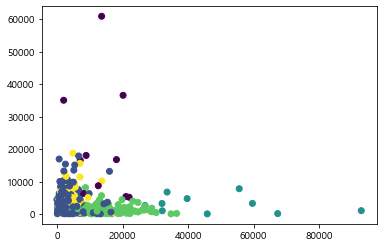

In [95]:
# 그래프로 시각화
raw_frm['cid']=cluster_label


plt.scatter(x=raw_frm['Grocery'],
           y=raw_frm['Frozen'],
           c=raw_frm['cid'])
plt.show()
plt.close()

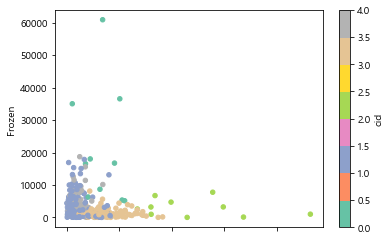

In [97]:
raw_frm.plot(kind='scatter',
            x='Grocery',
            y='Frozen',
            c='cid',
            colorbar=True,
            cmap='Set2')
plt.show()
plt.close()

### 고등학교 진학율 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터를 만들어보자
- 학습목표 : 지역에 따른 군집
- 데이터 인코딩, 지도 시각화(위도, 경도 - folium)

In [100]:
# 데이터 불러오기
school_frm = pd.read_excel('C:/Users/whgud/data/middle_shcool_graduates_report.xlsx',
                        header=0)
school_frm.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [103]:
school_frm.columns

Index(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'],
      dtype='object')

In [108]:
# 지도에 위치 표시
school_map=folium.Map(location=[37.5532036880752,126.98739716743572],
                zoom_start=12,
                tiles='Stamen Terrain')

for name, lat, lng in zip(school_frm.학교명,school_frm.위도,school_frm.경도):
    #print(name,lat,lng)
    folium.Marker([lat,lng],popup=name,icon=folium.Icon(color='red')).add_to(school_map)


school_map

In [109]:
school_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

## 지역에 따른 군집을 알아보자

### 실습 진행과정
#### 1. 데이터 전처리 - 데이터 라벨링 (지역, 코드, 유형, 주야)
#### 2. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고_국제고, 자사고 진학률
#### 3. 표준화
#### 4. 모형 객체 생성
#### 5. 모형 학습
#### 6. 예측
#### 7. 예측 결과를 데이터 프레임에 추가
#### 8. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### 9. 지도 그래프 시각화

####  1. 데이터 전처리  -  데이터 라벨링 (지역, 코드, 유형, 주야)

In [113]:
label_encoder = LabelEncoder()
region_encoder=label_encoder.fit_transform(school_frm['지역'])
code_encoder=label_encoder.fit_transform(school_frm['코드'])
type_encoder=label_encoder.fit_transform(school_frm['유형'])
day_encoder=label_encoder.fit_transform(school_frm['주야'])
school_frm['location']=region_encoder
school_frm['code']=code_encoder
school_frm['type']=type_encoder
school_frm['day']=day_encoder

school_frm.columns.values

array(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학',
       '취업', '미상', '위도', '경도', 'location', 'code', 'type', 'day'],
      dtype=object)

#### 2. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고_국제고, 자사고 진학률

In [117]:
X = school_frm.iloc[:,[10,11,14]]
X 

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282
...,...,...,...
410,0.000,0.000,0.000
411,0.000,0.000,0.000
412,0.000,0.000,0.000
413,0.000,0.000,0.000


#### 3. 표준화

In [118]:
scaled_X = feature_scaling(method='Standard', input_data=X)
scaled_X

array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

#### 4. 모형 객체 생성

In [119]:
cluster_model = KMeans(n_clusters=3)

#### 5. 모형 학습 & 6. 예측

In [121]:
cluster_model.fit(scaled_X)

cluster_label = cluster_model.labels_
cluster_label

array([2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0,

#### 7. 예측 결과를 데이터 프레임에 추가

In [122]:
# school_frm에 cluster_label을 새 칼럼으로 추가
school_frm['cid'] = cluster_label
school_frm.head()


,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,기타진학,취업,미상,위도,경도,location,code,type,day,cid
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.004,0,0.000,37.594942,127.038909,16,0,1,0,2
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.031,0,0.000,37.577473,127.003857,22,0,1,0,0
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.009,0,0.003,37.491637,127.071744,0,0,0,0,0
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.019,0,0.000,37.480439,127.062201,0,0,0,0,0
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.010,0,0.000,37.510750,127.008900,14,0,0,0,2


#### 8. 클러스터 값으로 그룹화, 그룹별 내용 출력

In [124]:
grp_col = [0,1,2]
grp_frm = school_frm.groupby('cid')
for key , grp in grp_frm:
    print('key : \n', key)
    print('cnt : \n', len(grp))
    print('data : \n')
    print(grp.iloc[:,grp_col])

key : 
 0
cnt : 
 137
data : 

     Unnamed: 0    지역               학교명
1             1   종로구  서울대학교사범대학부설여자중학교
2             2   강남구             개원중학교
3             3   강남구             개포중학교
9             9   강남구             대왕중학교
11           11   강남구             대치중학교
..          ...   ...               ...
378         378  서대문구            가재울중학교
379         379   성북구             길음중학교
380         380   강서구             마곡중학교
382         382   강남구             세곡중학교
414         414   노원구           한국삼육중학교

[137 rows x 3 columns]
key : 
 1
cnt : 
 227
data : 

     Unnamed: 0   지역        학교명
5             5  강남구      구룡중학교
17           17  서초구    서문여자중학교
20           20  서초구      서초중학교
28           28  서초구      언남중학교
29           29  강남구      언북중학교
..          ...  ...        ...
409         409  성북구     서울다원학교
410         410  강남구    국립국악중학교
411         411  금천구  국립전통예술중학교
412         412  광진구     선화예술학교
413         413   중구       예원학교

[227 rows x 3 columns]
key : 
 2
cnt : 
 51
data 

#### 9. 지도 그래프 시각화

In [128]:
colors = {0 : 'coral', 1 : 'blue', 2 : 'green'}

# 지도에 위치 표시

cluster_map = folium.Map(location=[37.5532036880752,126.98739716743572],
                zoom_start=12,
                tiles='Stamen Terrain')

for name, lat, lng, cid in zip(school_frm.학교명,school_frm.위도,school_frm.경도, school_frm.cid):
    folium.Marker([lat,lng],
                  popup=name,
                  icon=folium.Icon(color=colors[cid])).add_to(cluster_map)
cluster_map